In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

<img src="./img/Circuit.png" style="width: 50%; height: 50%"> </img>

<img src="./img/treqs.png" style="width: 30%; height: 30%"> </img>

In [3]:
def CPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out

def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out

def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

In [4]:
pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01213a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [5]:
R0 = data_active[data['0LabID (PCG)'] == 'NT01213']['Ro'].values[0]
Rinf = data_active[data['0LabID (PCG)'] == 'NT01213']['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == 'NT01213']['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == 'NT01213']['Qh'].values[0]
pRh = data_active[data['0LabID (PCG)'] == 'NT01213']['pRh'].values[0]
pQh = data_active[data['0LabID (PCG)'] == 'NT01213']['pQh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == 'NT01213']['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == 'NT01213']['Fh'].values[0]
Rl = data_active[data['0LabID (PCG)'] == 'NT01213']['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == 'NT01213']['Ql'].values[0]
pRl = data_active[data['0LabID (PCG)'] == 'NT01213']['pRl'].values[0]
pQl = data_active[data['0LabID (PCG)'] == 'NT01213']['pQl'].values[0]
Pl = data_active[data['0LabID (PCG)'] == 'NT01213']['Pl'].values[0]
Re = data_active[data['0LabID (PCG)'] == 'NT01213']['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == 'NT01213']['Qe'].values[0]
Pef = data_active[data['0LabID (PCG)'] == 'NT01213']['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == 'NT01213']['Pe-i'].values[0]

/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [9]:
data_active[data['Facies'] == 'PK']

/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,Facies,0LabID (PCG),Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],...,Rl,Ql,Pl,Fl,pRl,pQl,Re,Qe,Pe-f,Pe-i
25,PK,NT01213,K1P-0807,64.327019,-109.814587,92,0.000504,90.160425,0.025462,2.245943,...,2.075,0.02219,0.4117,281.1,6070000,7.58e-09,10000000000,0.0009194,0.6584,0.5648
33,PK,NT01217,K1P-0825,64.325336,-109.817348,157,0.000272,20.391961,0.021703,2.244102,...,347.6,5.092e-06,0.6585,2406,1607,6.947e-07,10000000000,0.01008,0.2251,0.7095


In [10]:
# Rh, Qh, Ph = 3250, 1e-6, 0.422
def fitfun(R0, Rh, Qh, Ph, Rl, Ql, Pl, Re, Qe, Pef, Pei):
    Zh = CPEfunSeries(Rh, Qh, Ph, frequency)
    Zl = CPEfunSeries(Rl, Ql, Pl, frequency)
    Ze = CPEfunElec(Re, Qe, Pef, Pei, frequency)
    Z = 1./(1./R0+1./Zh+1./Zl)+Ze
    fig = plt.figure(figsize = (12, 4))
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.loglog(temp[:,0], temp[:,4], 'k-')
    ax1.loglog(temp[:,0], abs(temp[:,5]), 'r-')
    ax.loglog(temp[:,0], Z.real, 'k.')
    ax1.loglog(temp[:,0], abs(Z.imag), 'r.')

    ax.grid(True)
    # ax.set_ylim(temp[:,4].min(), temp[:,4].max())
#     ax1.set_ylim(abs(temp[:,5]).min(), abs(temp[:,5]).max())
    ax.invert_xaxis()
    ax1.invert_xaxis()
    return plt.show()

In [11]:
frequency = temp[:,0].copy()

In [13]:
# from ipywidgets import interact, FloatText, FloatSlider


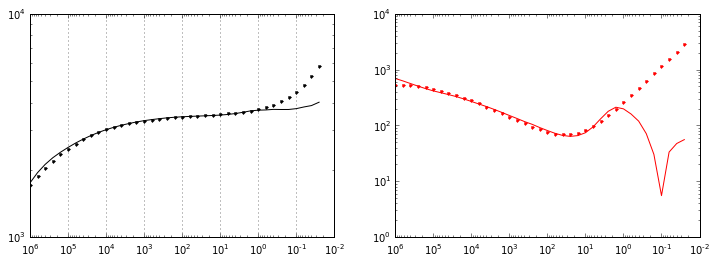

<function __main__.fitfun>

In [14]:
from IPython.html.widgets import interact, FloatText, FloatSlider
interact(fitfun, R0=FloatText(value=R0),\
    Rh=FloatText(value=pRh), Qh=FloatText(value=pQh), 
    Ph=FloatSlider(min = 0.1, max = 1., step = 0.1, value=Ph),
    Rl=FloatText(value=1.), Ql=FloatText(value=pQl), Pl=FloatText(value=Pl),        
    Re=FloatText(value=Re), Qe=FloatText(value=Qe), Pef=FloatText(value=Pef), Pei=FloatText(value=Pei))

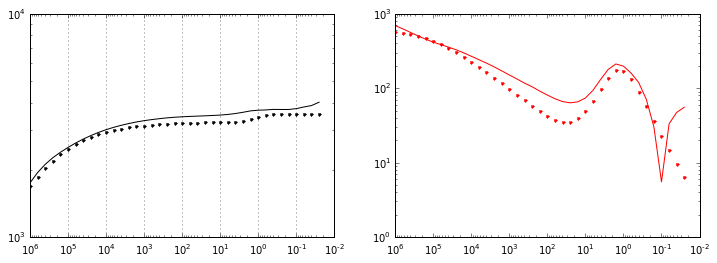

None

<function __main__.fitfun>

In [19]:
interact(fitfun, R0=FloatText(value=3290),\
    Rh=FloatText(value=34.7), Qh=FloatText(value=3.97e-7), Ph=FloatText(value=0.422),
    Rl=FloatText(value=1e10), Ql=FloatText(value=1.1e-6), Pl=FloatText(value=0.364),        
    Re=FloatText(value=264), Qe=FloatText(value=4.75e-4), Pef=FloatText(value=1.), Pei=FloatText(value=1.17))

In [16]:
f0peak = lambda R, Q, P: (R*Q)**(-1./P)/np.pi/2.
taupeak = lambda R, Q, P: (R*Q)**(1./P)
rhoinf = lambda rhom, rhol, rho0: 1./(1./rho0+1./rhom+1./rhol)
charg = lambda rhoinf, rho0: (rho0-rhoinf) / rhoinf

def TKCColeColeParallel(frequency, R0, Rh, Qh, Ph, Rl, Ql, Pl, geom=1.):
    fpeakl = f0peak(Rl, Ql, Pl)
    rhol = CPEfunSeries(Rl, Ql, Pl, frequency)*geom
    rho0 = R0*geom
    rhoinf = 1./(1./R0+1./Rl)
    m = (rho0-rhoinf)/rho0
    rho = 1./(1./rho0+1./rhol)
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 3))
    ax[0].semilogx(frequency, rho.real, 'k-', lw=2)
    ax1 = ax[0].twinx()
    ax1.semilogx(frequency, (rho.imag), 'k--', lw=2)
    ax1.invert_yaxis()
    ax[0].grid(True)
    ax[1].plot(rho.real, rho.imag, 'k-')

    ax[1].invert_yaxis()
    ax[1].grid(True)

    
    print "R0 = ", rho0
    print "Rinf = ", rhoinf
    print "Chargeability = ", m    
    print "Tau = ", 1./fpeakl  
    return 

R0 =  91.44
Rinf =  3371.42857143
Chargeability =  -35.8703912011
Tau =  0.00256689708585


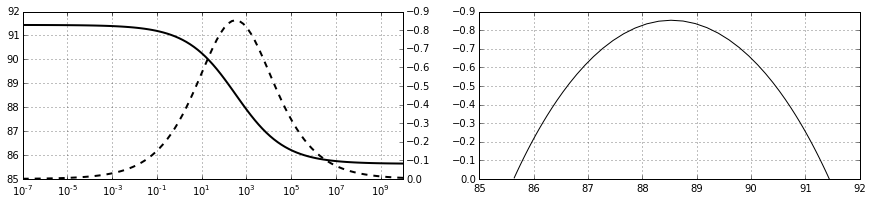

In [17]:
R0 = 3600
Rh, Qh, Ph = 34.7, 3.97e-7, 0.422
Rl, Ql, Pl = 5.31e4, 1.1e-6, 0.364
# frequency = temp[:,0].copy()
frequency = np.logspace(-7, 10, 101)
TKCColeColeParallel(frequency, R0, Rh, Qh, Ph, Rl, Ql, Pl, geom = 0.0254)

(1.5569720885901273, 1.9486571969681217)

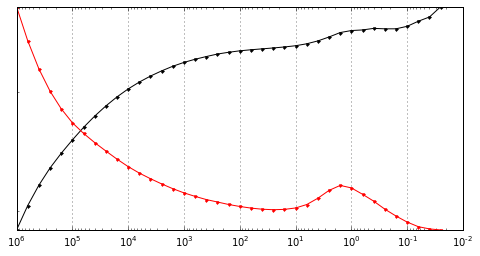

In [18]:
import scipy as sp
amp = lambda x, y: np.sqrt(x**2+y**2)
fig = plt.figure(figsize = (8, 4))
frequency = temp[:,0].copy()
ax = plt.subplot(111)
ax1 = ax.twinx()
ax.loglog(temp[:,0], amp(temp[:,4], temp[:,5]), 'k.-')
ax1.loglog(temp[:,0], sp.arctan2(temp[:,4], temp[:,5]), 'r.-')
ax.invert_xaxis()
ax.grid(True)
ax.set_ylim(amp(temp[:,4], temp[:,5]).min(), amp(temp[:,4], temp[:,5]).max() )
ax1.set_ylim(sp.arctan2(temp[:,4], temp[:,5]).min(), sp.arctan2(temp[:,4], temp[:,5]).max() )